In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = r"C:\Users\bolaj\Desktop\Desk\Data\Finance Loan Approval\train.csv"
data1 = r"C:\Users\bolaj\Desktop\Desk\Data\Finance Loan Approval\test.csv"

In [3]:
Train = pd.read_csv(data)
Test = pd.read_csv(data1)

In [4]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
Train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
Train.isna().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
# method1
# Drop rows where 'Credit_History' has missing values
Train = Train.dropna(subset=['Credit_History'])

Train.isna().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
Train = Train.drop('Loan_ID',axis=1)

In [10]:
print(Train.shape, "\n") 
print(Train.columns, "\n") 

categorical = [var for var in Train.columns if Train[var].dtype == 'object']
numerical = [var for var in Train.columns if Train[var].dtype != 'object']

print("Categorical Features:", categorical)
print("Numerical Features:", numerical)
print()

for var in numerical:
    print(f"{var}: [{Train[var].min()}, {Train[var].max()}]")

(564, 12) 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 

Categorical Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

ApplicantIncome: [150, 81000]
CoapplicantIncome: [0.0, 33837.0]
LoanAmount: [9.0, 700.0]
Loan_Amount_Term: [36.0, 480.0]
Credit_History: [0.0, 1.0]


In [11]:
from sklearn.impute import SimpleImputer

# Impute missing values in categorical features with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
Train.loc[:, categorical] = categorical_imputer.fit_transform(Train[categorical])

Train.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Impute missing values in numerical features with median
numerical_imputer = SimpleImputer(strategy='median')
Train.loc[:, numerical] = numerical_imputer.fit_transform(Train[numerical])

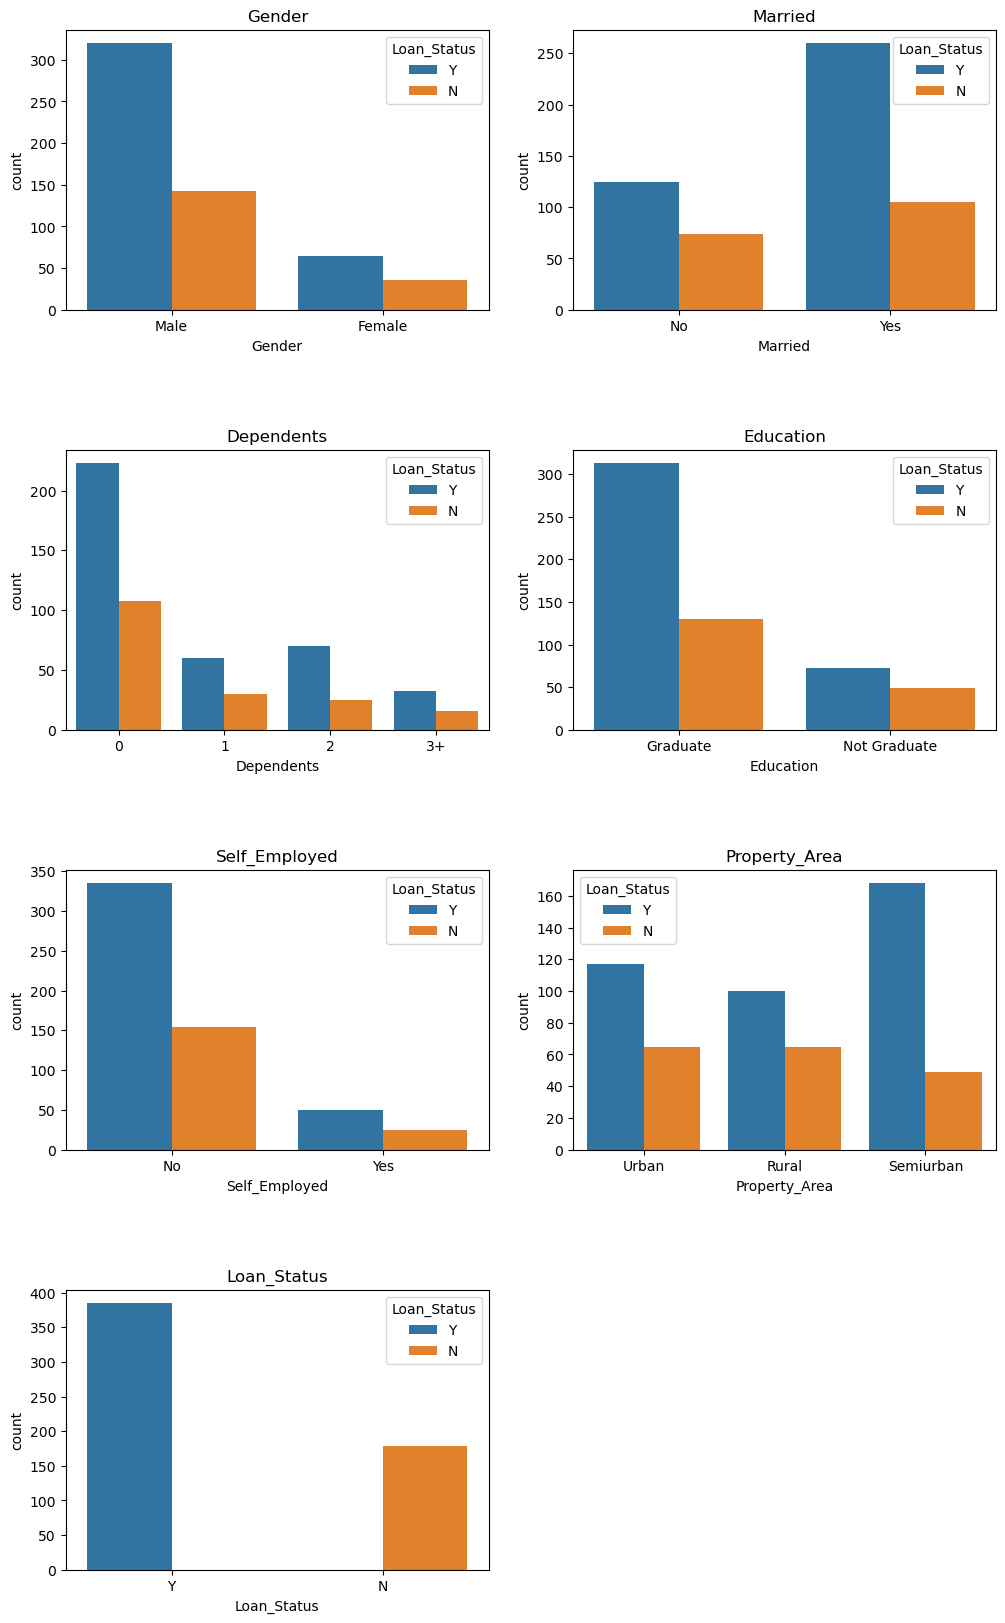

In [13]:
# Assuming categorical is a list of categorical variable names
num_plots = len(categorical)

# Generate subplots dynamically
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

# Iterate over categorical variables
for idx, cat_col in enumerate(categorical):
    row, col = idx // 2, idx % 2
    # Create count plot for current categorical variable
    sns.countplot(x=cat_col, data=Train, hue='Loan_Status', ax=axes[row, col])
    axes[row, col].set_title(cat_col)

# Remove empty subplots if any
if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5)

# Show plot
plt.show()

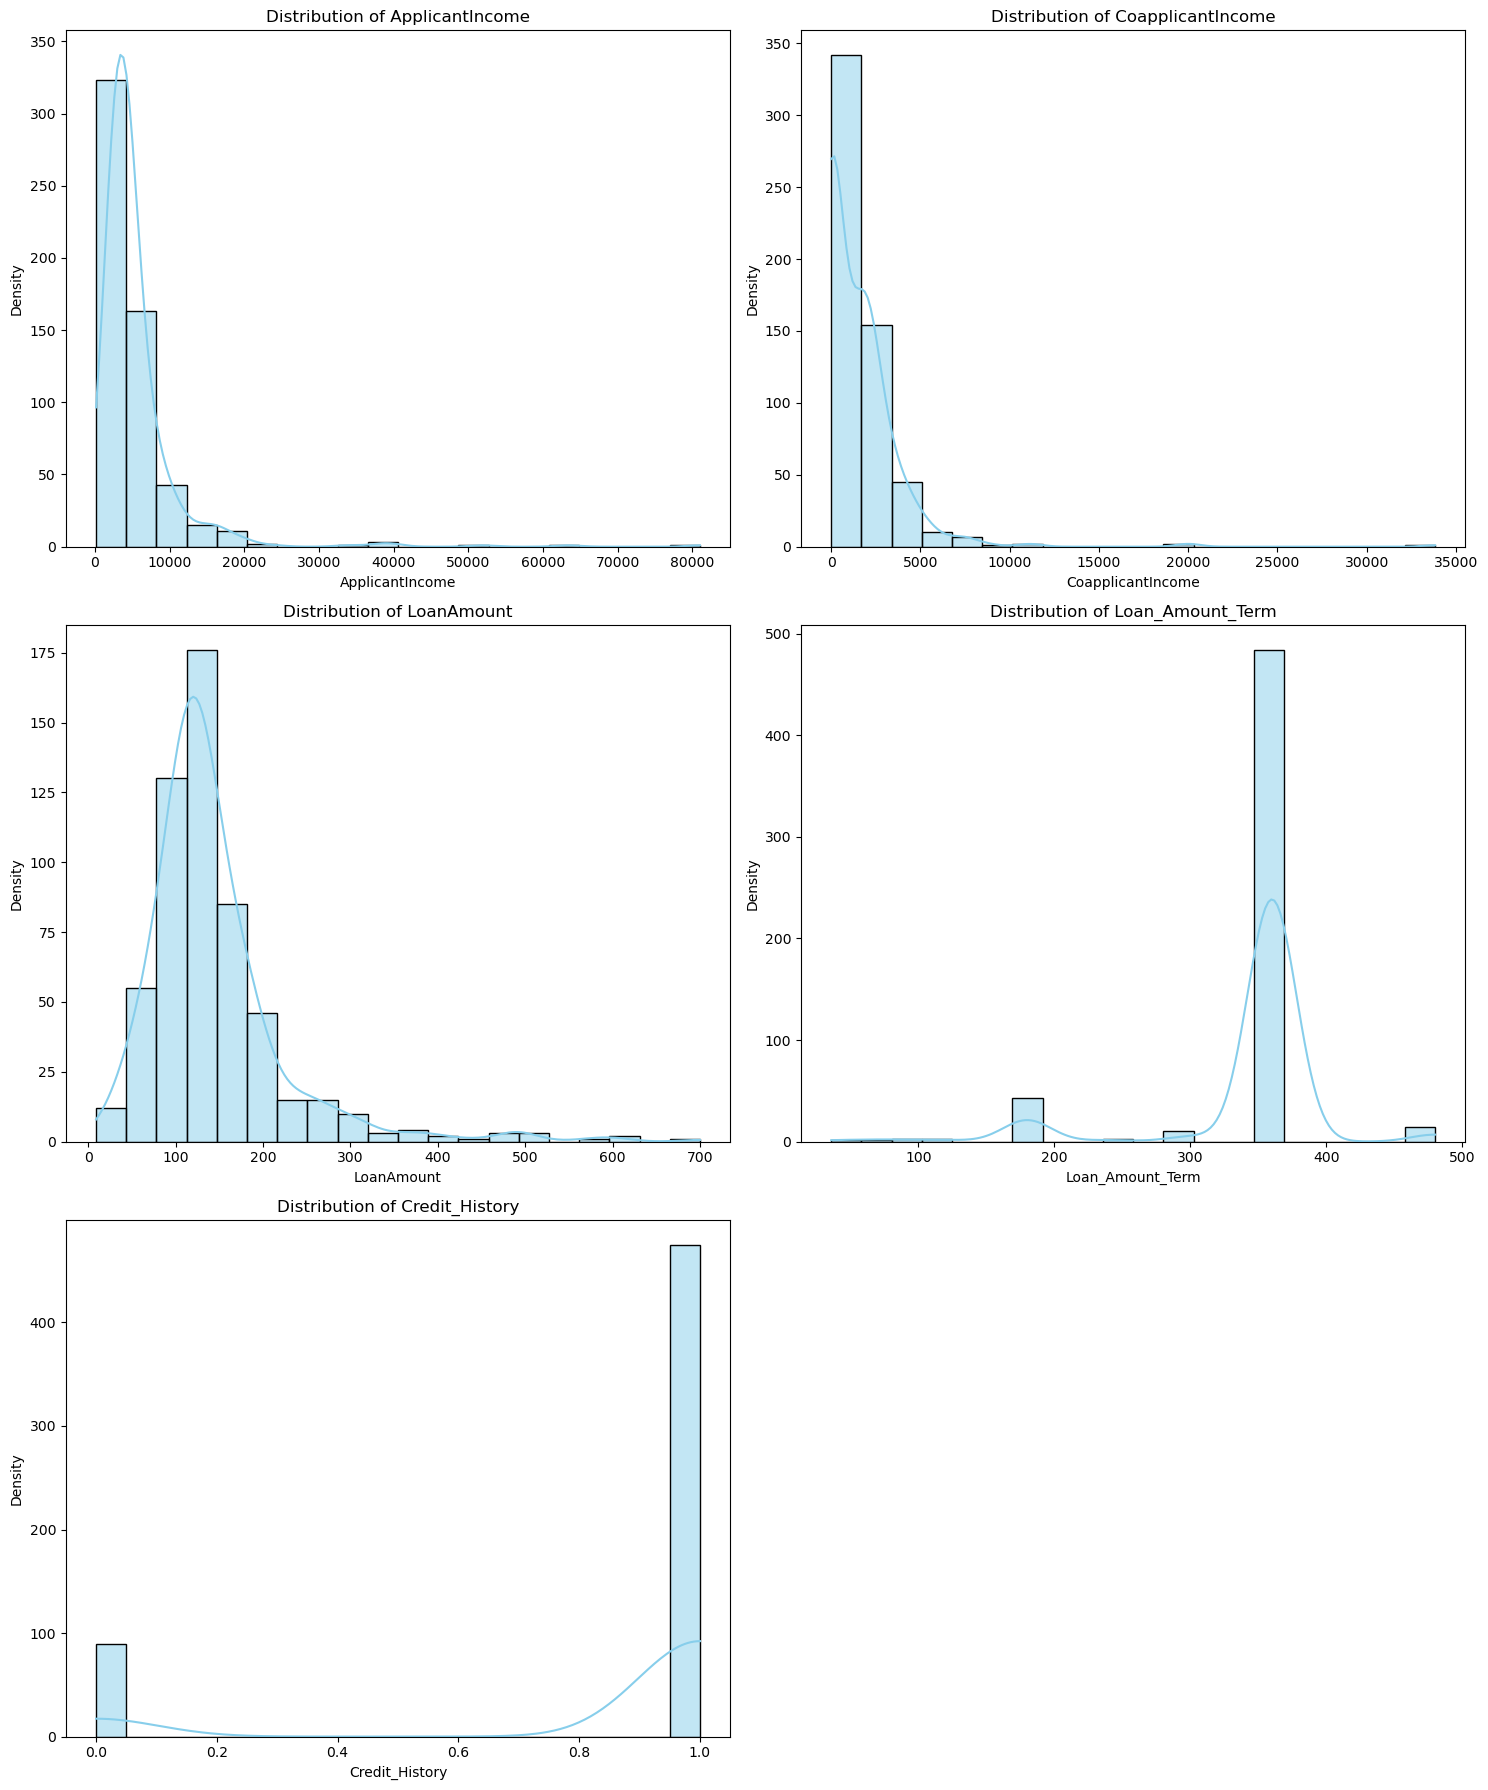

In [14]:
# Define categorical and numerical variables
categorical = [var for var in Train.columns if Train[var].dtype == 'object']
numerical = [var for var in Train.columns if Train[var].dtype != 'object']

# Calculate the number of rows needed
num_rows = (len(numerical) + 1) // 2

# Plot histograms for all numerical features
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 6))

for i, var in enumerate(numerical):
    row = i // 2
    col = i % 2
    sns.histplot(data=Train, x=var, kde=True, color='skyblue', bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Density')

# Remove empty subplots if any
if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

# Adjust layout
plt.tight_layout()
plt.show()

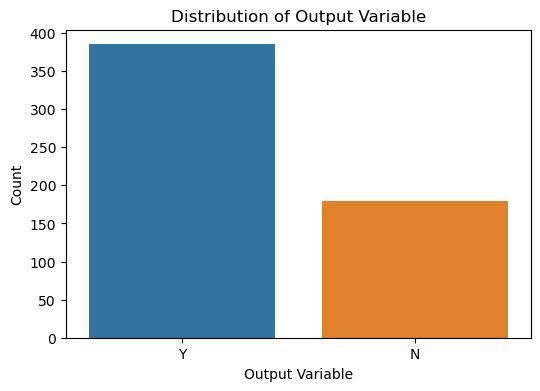

In [15]:
# Count the occurrences of each category in the output variable
output_var_counts = Train['Loan_Status'].value_counts()

# Plot the counts using Seaborn's countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=Train, x='Loan_Status')
plt.title('Distribution of Output Variable')
plt.xlabel('Output Variable')
plt.ylabel('Count')
plt.show()

In [16]:
# pip install pivottablejs

In [17]:
from pivottablejs import pivot_ui
pivot_ui(Train)

In [18]:
Train['Loan_Status'].nunique()

2

In [19]:
Train['Loan_Status'] = Train['Loan_Status'].replace({'Y': 1, 'N': 0})

In [20]:
#import train_test split
from sklearn.model_selection import GridSearchCV, train_test_split

#import regression models
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

#import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score

#import pipeline and transformers
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

#import preprocessors 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#import train_test split
from sklearn.model_selection import train_test_split

In [21]:
Train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
X ,y = Train.drop(['Loan_Status'],axis=1),Train['Loan_Status']

# Set a random seed for reproducibility
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.1, train_size=0.1, random_state=random_seed)

In [23]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural
250,Male,Yes,0,Not Graduate,No,1668,3890.0,201.0,360.0,0.0,Semiurban
144,Male,Yes,2,Graduate,No,11757,0.0,187.0,180.0,1.0,Urban
88,Male,No,0,Graduate,No,8566,0.0,210.0,360.0,1.0,Urban
338,Female,No,3+,Not Graduate,No,1830,0.0,127.0,360.0,0.0,Urban


In [24]:
#numerical features excluding booleans and object to list 
numeric_features = X_train.select_dtypes(exclude=['bool', 'object']).columns.tolist()

#setting up a pipeline for scaling the numerical features
numeric_transformer = Pipeline(
    steps=[ 
        ("scaler", StandardScaler())
    ]
).set_output(transform='pandas')
numeric_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [25]:
encoding = make_pipeline(
  OneHotEncoder(
        sparse=False, 
        handle_unknown='infrequent_if_exist',min_frequency =0.01
    ),
)
encoding

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                               min_frequency=0.01, sparse=False))])

In [26]:
category_column = X_train.select_dtypes(exclude=['float64','int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ('Onehot',encoding,category_column)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term',
                                  'Credit_History']),
                                ('Onehot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.01,
                                                                sparse=False))]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Education', 'Self_Employed',
                                  'Property_Area'])],
                  verbose_feature_names_out=False)

In [27]:
X_train = preprocessor.fit_transform(X_train,y_train)

In [28]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
409,6.391359,-0.518800,2.171791,0.155846,-1.914854,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
250,-0.456021,0.696496,0.557228,0.155846,-1.914854,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
144,0.414791,-0.518800,0.415065,-2.753273,0.522233,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
88,0.139366,-0.518800,0.648618,0.155846,0.522233,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
338,-0.442038,-0.518800,-0.194205,0.155846,-1.914854,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [29]:
X_test=preprocessor.transform(X_test)

In [30]:
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
586,-0.401730,-0.043304,-0.427758,0.155846,0.522233,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
570,-0.305059,0.027927,0.404910,0.155846,0.522233,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
253,-0.370312,1.699661,1.349278,-2.753273,0.522233,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
571,-0.158414,-0.065485,0.191666,0.155846,-1.914854,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
528,-0.368758,-0.112035,-0.529303,0.155846,0.522233,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [31]:
Gbrpipeline = Pipeline(
    steps=[
        ("gbr", GradientBoostingClassifier()
        )
    ]
).set_output(transform='pandas')
Gbrpipeline

Pipeline(steps=[('gbr', GradientBoostingClassifier())])

In [32]:
import time

In [33]:
Gbrpipeline.fit(X_train, y_train)

Pipeline(steps=[('gbr', GradientBoostingClassifier())])

In [34]:
Gbrpipeline.score(X_train, y_train), Gbrpipeline.score(X_test,y_test)

(1.0, 0.7719298245614035)

In [35]:
# Predict the target values for the test data
y_pred_Gbr = Gbrpipeline.predict(X_test)
y_pred_Gbr

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [36]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_Gbr)

# Print the classification report
print("Classification Report:")
print(report)


Accuracy: 0.7719298245614035


In [38]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_Gbr)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11 10]
 [ 3 33]]


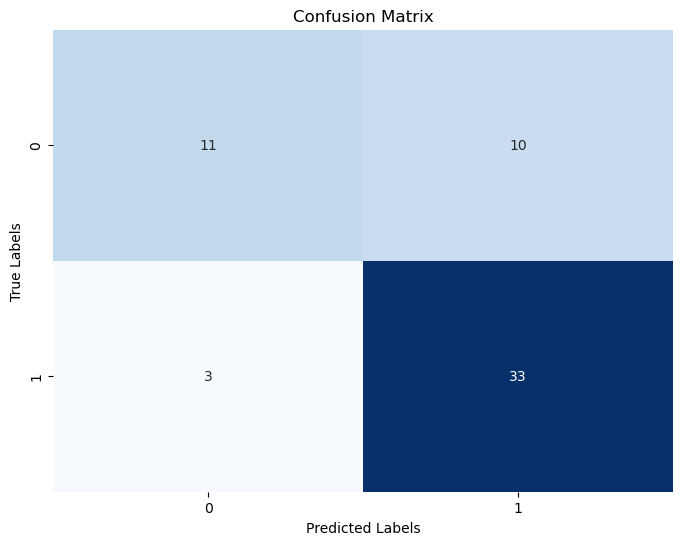

In [39]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [40]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [20, 35, 100],
    'learning_rate': [0.01, 0.1], 
    'max_depth': [3, 4, 5], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [41]:
# Initialize the gradient boosting classifier
gb_clf = GradientBoostingClassifier()

In [42]:
# Initialize GridSearchCV with the defined parameter grid and the classifier
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [43]:
# Perform grid search on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 35, 100],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [44]:
# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20, 'subsample': 0.8}


In [45]:
# Get the best estimator
best_gb_clf = grid_search.best_estimator_

In [48]:
gb_pred = best_gb_clf.predict(X_test)

In [49]:
# Generate classification report
report = classification_report(y_test, gb_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.52      0.65        21
           1       0.77      0.94      0.85        36

    accuracy                           0.79        57
   macro avg       0.81      0.73      0.75        57
weighted avg       0.80      0.79      0.78        57



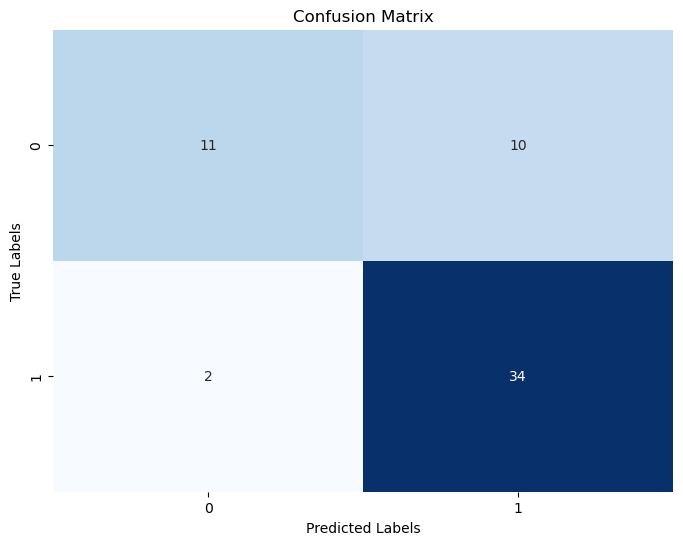

In [50]:
gd_conf_matrix = confusion_matrix(y_test, gb_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gd_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define the number of folds for cross-validation
num_folds = 10

# Initialize the cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize your classification model (replace with your model)
model = GradientBoostingClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

In [59]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

Cross-validation scores: [0.66666667 0.83333333 1.         0.66666667 0.83333333 1.
 0.8        0.6        0.6        0.8       ]
Mean CV accuracy: 0.78
Standard deviation of CV accuracy: 0.13920408678547402
